In [1]:
"""
Play the RF mapping for one unit.

Tony Fu, July 8, 2022
"""
import sys

from torchvision import models
from torchvision.models import AlexNet_Weights, VGG16_Weights
import matplotlib.pyplot as plt
import matplotlib.animation as animation
%matplotlib ipympl

sys.path.append('..')
from image import make_box
from mapping import BarRfMapperP4a
import constants as c

The RF mapper is for Conv2 (not Conv1) with input shape (yn = 227, xn = 227).


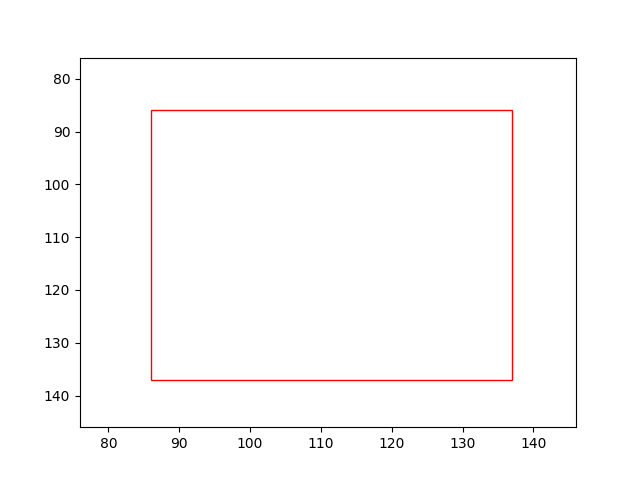

In [3]:
model = models.alexnet(weights=AlexNet_Weights.IMAGENET1K_V1)
bm = BarRfMapperP4a(model, 1, (227, 227))
bm.set_debug(True)
a = bm.animate(1)

fig, ax = plt.subplots()

def animate_func(frame):
    plt.imshow(frame[0], cmap='gray')
    plt.title(f"frame {frame[2]}, response = {frame[1]:.2f}")

ani = animation.FuncAnimation(
    fig, animate_func, frames=a, interval=300, save_count=0, cache_frame_data=False, repeat=False)

ax = plt.gca()
ax.add_patch(make_box(bm.box))
boundary = 10
plt.xlim([bm.box[1] - boundary, bm.box[3] + boundary])
plt.ylim([bm.box[0] - boundary, bm.box[2] + boundary])
ax.invert_yaxis()
plt.show()